## Import

In [1]:
import twitter # To install: open PowerShell, type `pip install twitter`
import requests
from wordcloud import WordCloud # To install: open PowerShell, type `conda install -c https://conda.anaconda.org/conda-forge wordcloud`
import matplotlib.pyplot as plt
import re
import operator

from collections import Counter

# You can also import other things ...

## Tạo đối tượng twitter_api

In [2]:
# TODO: assign your values (see how to get them in slides) to 4 variables below
CONSUMER_KEY = 'secret'
CONSUMER_SECRET ='secret'
OAUTH_TOKEN = 'secret'
OAUTH_TOKEN_SECRET = 'secret'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

## Thu thập các tweet có hashtag #datascience

In [3]:
search_results = twitter_api.search.tweets(q='#datascience', count=50)

# Init variables
statuses = search_results['statuses']
page_idx = 0 # First page

# Print search info
print 'Page %d, %d statuses' %(page_idx, len(search_results['statuses']))

# Go to next page, then next page, then next page ...
while True:
    # Go to next page
    try:
        next_search = search_results['search_metadata']['next_results']
        kwargs = dict([requests.utils.unquote(kv).split('=') for kv in next_search[1:].split('&')])
        search_results = twitter_api.search.tweets(**kwargs)
    except:
        break # No more page, or ...
    
    # Update variables
    statuses += search_results['statuses']
    page_idx += 1
    
    # Print search info
    print 'Page %d, %d statuses' %(page_idx, len(search_results['statuses']))

# Print info
print '*'*50
print 'Num statuses =', len(statuses)

Page 0, 50 statuses
Page 1, 50 statuses
Page 2, 50 statuses
Page 3, 50 statuses
Page 4, 50 statuses
Page 5, 50 statuses
Page 6, 50 statuses
Page 7, 50 statuses
Page 8, 50 statuses
Page 9, 50 statuses
Page 10, 50 statuses
Page 11, 50 statuses
Page 12, 50 statuses
Page 13, 50 statuses
Page 14, 50 statuses
Page 15, 50 statuses
Page 16, 35 statuses
**************************************************
Num statuses = 835


## Phân tích dữ liệu

**a. Vẽ "word cloud" thể hiện số lần xuất hiện của mỗi từ**

Để vẽ "word cloud", ta sẽ dùng thư viện wordcloud đã import ở trên. Ví dụ về cách sử dụng thư viện này:

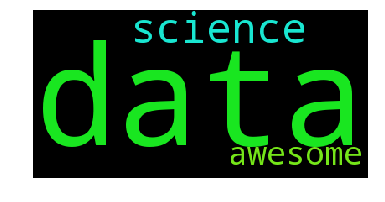

In [4]:
text = 'Data, data, data. Data science is awesome!'
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Như có thể thấy, ta chỉ cần truyền vào một chuỗi là đoạn code trên sẽ thống kê số lần xuất hiện của mỗi từ trong chuỗi, rồi vẽ ra "word cloud". Từ có số lần xuất hiện càng nhiều thì kích thước của từ đó trong "word cloud" sẽ càng lớn [từ "is" không xuất hiện vì từ "is" là từ không có nhiều ý nghĩa (được gọi là "stop word"; một số vd khác về "stop word" là: "a", "an", "the", ...) nên không được đếm].

Như vậy, với mỗi `status` trong danh sách `statuses`, bạn sẽ lấy ra `status['text']` (là phần nội dung văn bản của tweet); rồi nối tất cả các `status['text']` lại với nhau để ra một chuỗi duy nhất (có thể dùng ký tự `\n` để nối lại). Sau đó, bạn có thể truyền chuỗi này vào phương thức `generate` như trong ví dụ ở trên để vẽ ra "word cloud". 

In [5]:
text = "\n".join([x['text'] for x in statuses])

Bạn có thấy từ "https" xuất hiện nhiều nhất trong hình? Đó là do trong các tweet có các đường link. Bạn hãy tìm cách để bỏ các đường link ra rồi mới vẽ "word cloud".

In [6]:
text = re.sub(r'http\S+', '', text)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**b. Vẽ "word cloud" thể hiện số lần xuất hiện của mỗi user-được-nhắc-đến**

Gợi ý: trong mỗi `status`, danh sách các user-được-nhắc-đến nằm ở `status['entities']['user_mentions']`; với mỗi user-được-nhắc-đến, bạn lấy thành phần `screen_name` (tên của user) để thống kê số lần xuất hiện.

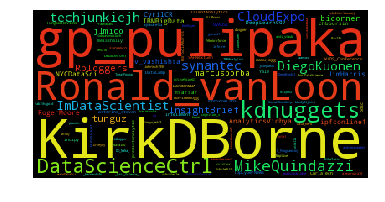

In [7]:
# TODO
user_mentions = [x['entities']['user_mentions'] for x in statuses if len(x['entities']['user_mentions'])>0 ]
users_screen_names = [y['screen_name'] for x in user_mentions for y in x]

wordcloud = WordCloud().generate(" ".join(users_screen_names))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TODO: follow user xuất hiện nhiều nhất :-)

Cool